In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [16]:


NETFLIX = 'netflix_titles.csv'
RATING_MAP = {
    'A': 'R',
    'UR': 'NR',
    'TV-Y7-FV': 'TV-Y7',
}
USECOLS = ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

df = pd.read_csv(filepath_or_buffer=NETFLIX, encoding='iso8859_10', usecols=USECOLS, index_col=['show_id'], )
df['rating'] = df['rating'].apply(func=lambda x: x if x not in RATING_MAP.keys() else RATING_MAP[x])
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [29]:
movies = df[df['type'] == 'Movie']
series = df[df['type'] == 'TV Show']
#to make sure there isn't any other type other than movies and tv shows
filtered_df = df.query("type != 'Movie' & type != 'TV Show'")
filtered_df.shape
series.shape


(2677, 11)

In [36]:
#series.groupby()
series.fillna('Not Specified/mostly USA', inplace=True)
series.head()

C:\Users\obadz\AppData\Local\Temp\ipykernel_14680\2430064472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.fillna('Not Specified/mostly USA', inplace=True)


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s2,TV Show,Blood & Water,Not Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Specified,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,Not Specified,Not Specified,Not Specified,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,Not Specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Not Specified,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


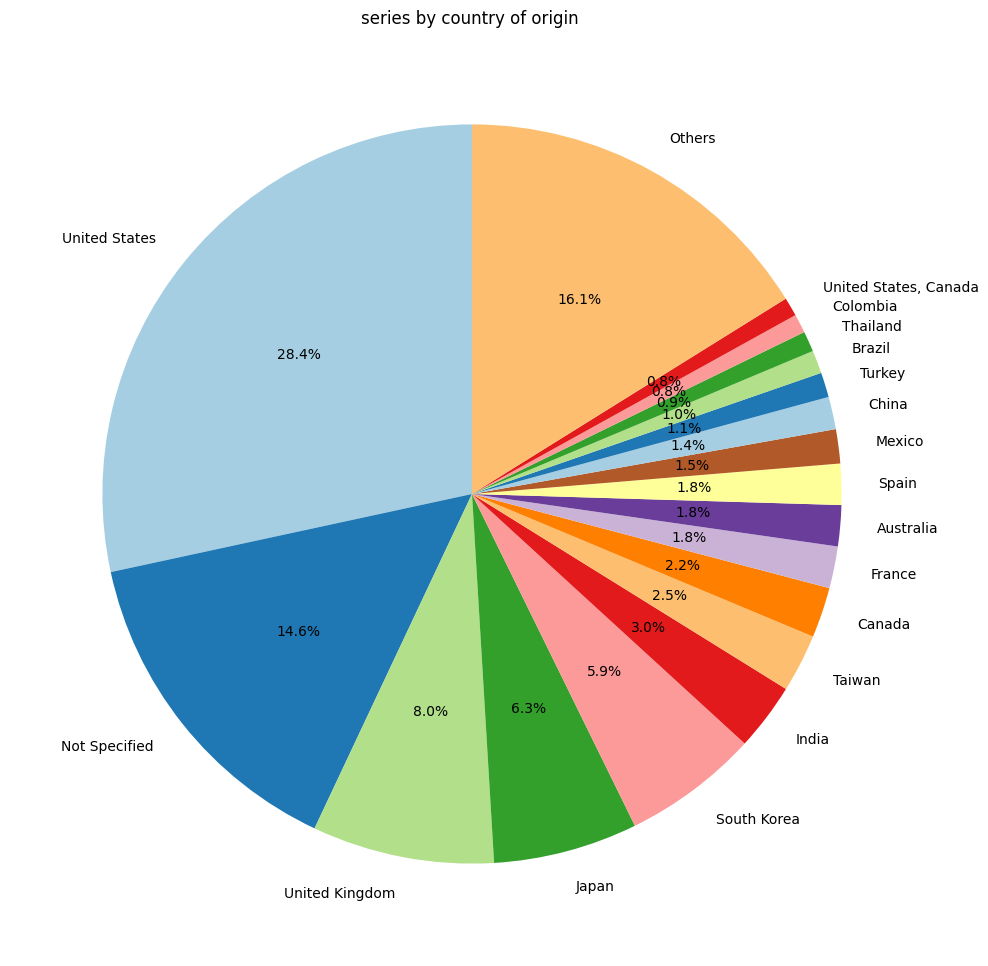

In [41]:
name_counts = series['country'].value_counts()

total = name_counts.sum()
name_percentages = (name_counts / total) * 100

# Filter small categories and sum them into 'Others'
threshold = 0.75
small_categories = name_percentages < threshold
other_countries = name_percentages[small_categories].sum()
large_categories = name_percentages[~small_categories]

# If there are any small categories, add 'Others'
if other_countries > 0:
    large_categories['Others'] = other_countries


# Create a pie chart
plt.figure(figsize=(12,12)) 
plt.pie(large_categories, labels=large_categories.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('series by country of origin')
plt.show()

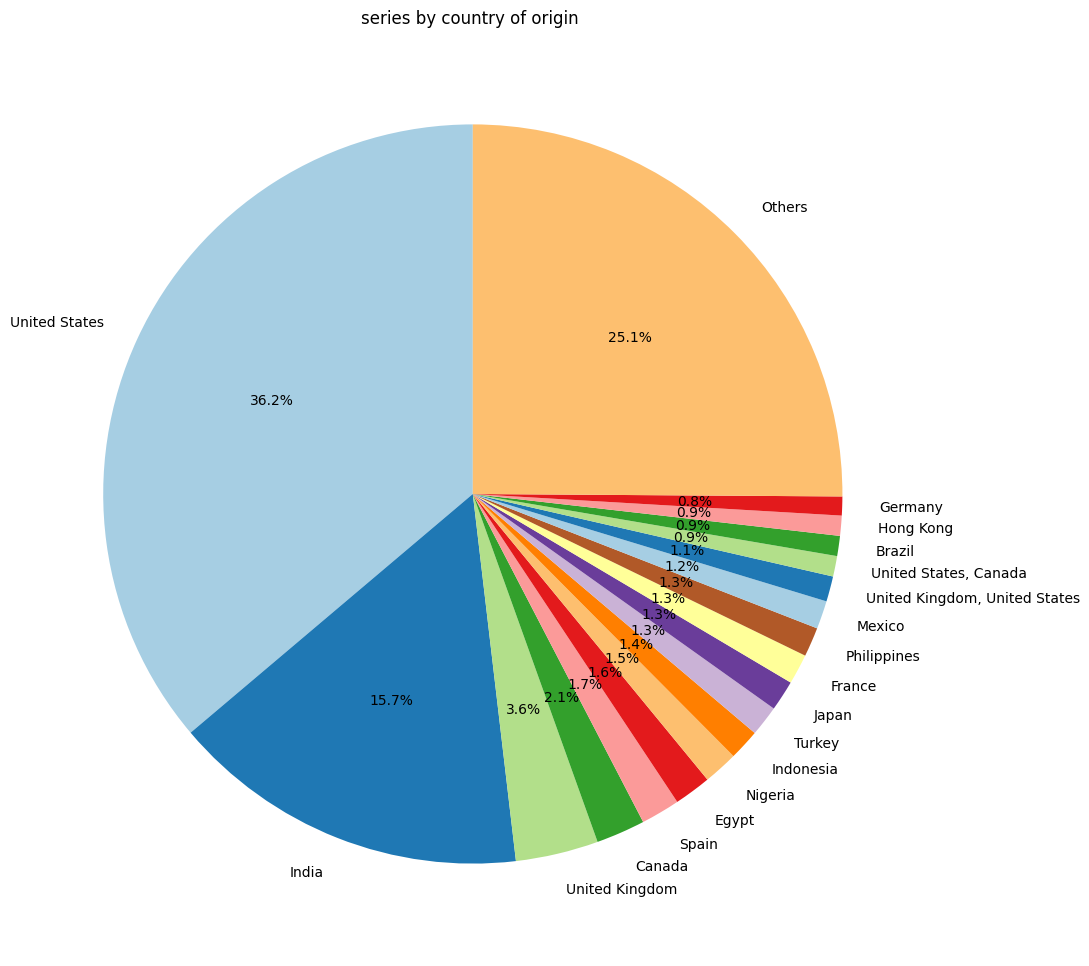

In [42]:
name_counts = movies['country'].value_counts()

total = name_counts.sum()
name_percentages = (name_counts / total) * 100

# Filter small categories and sum them into 'Others'
threshold = 0.75
small_categories = name_percentages < threshold
other_countries = name_percentages[small_categories].sum()
large_categories = name_percentages[~small_categories]

# If there are any small categories, add 'Others'
if other_countries > 0:
    large_categories['Others'] = other_countries


# Create a pie chart
plt.figure(figsize=(12,12)) 
plt.pie(large_categories, labels=large_categories.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('movies by country of origin')
plt.show()